 TSA passenger‑forecasting model

OVERVIEW

The goal of this project was to build a baseline forecasting model for daily TSA passenger volumes using historical data from 2019 to mid-2025. I focused on establishing a simple and interpretable machine learning approach rather than maximizing accuracy. The model relies primarily on time-based features to capture strong weekly and yearly travel patterns. This report describes the data preparation, modeling approach, and key learnings from building the baseline forecast.

IMPORTING LIBRARIES - Pandas, Numpy, Datetime, Matplotlib, Seaborn, Sci Kit Learn

In [ ]:
#Pandas and Numpy for data maniupulation
import pandas as pd 
import numpy as np
#Date handling
from datetime import datetime, timedelta
#Seaborn and Matplotlib for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
#Machine Learning Model - Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
#Loss metrics to assess performance
from sklearn.metrics import mean_squared_error, mean_absolute_error


Importing File and observing features

In [81]:
train_df = pd.read_csv('tsa_train.csv')
test_df = pd.read_csv('tsa_test.csv')
train_df.head()
print("Features: ")
print(train_df.columns)
print(test_df.columns)

Features: 
Index(['Date', 'Volume', 'Day_of_Week', 'Is_Weekend', 'Month', 'Week_of_Year',
       'Holiday', 'Lag_7', 'Rolling_7day_Mean'],
      dtype='object')
Index(['Date', 'Volume', 'Day_of_Week', 'Is_Weekend', 'Month', 'Week_of_Year',
       'Holiday', 'Lag_7', 'Rolling_7day_Mean', 'tsa_test_predictions'],
      dtype='object')


**Features Explained**:

Date (Given) - Date of travel 

Volume (Given) - Number of passengers passing through TSA

Day_of_week - Corresponding day of the week from Sunday - Saturday (0-6)

Is_Weekend - A binary 1 or 0 value explaining whether the observed day is a weekend or otherwise

Month - Corresponding month to the date (1-12)

Holiday - A metric that lists 1 if the corresponding day is within 2 days of a holiday and 0 
otherwise

Lag_7 - Passenger Volume 7 days ago

Rolling_7Day_Mean - Average passenger volumes in the past 7 days

Assigning features, Volume, and setting variable x to the train data frame and the variable y to the target variable, number of passengers

In [76]:
features = ['Date', 'Volume', 'Day_of_Week', 'Is_Weekend', 'Month', 'Week_of_Year',
       'Holiday', 'Lag_7', 'Rolling_7day_Mean']

volume = 'Volume'

X = train_df[features]
Y = train_df[volume]


Setting Up test/train validation and enabling random forest regressor model

In [67]:
split_idx = int(len(train_df) * 0.9) 
X_train, X_val = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_val = y.iloc[:split_idx], y.iloc[split_idx:]


Removal of non numeric columns (incompatible with randomn forest regressor)

In [68]:
X_train = X_train.drop(columns=['Date'], errors='ignore')
X_val = X_val.drop(columns=['Date'], errors='ignore')

In [69]:
model = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Validating Data with Root Mean Squared Error and Mean Absolute Error equations

In [ ]:
y_val_pred = model.predict(X_val)
y_val_pred = model.predict(X_val)

# MAE
mae = mean_absolute_error(y_val, y_val_pred)

# RMSE
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

print(f"Validation MAE: {mae:.2f}")
print(f"Validation RMSE: {rmse:.2f}")

Validation MAE: 1812.91
Validation RMSE: 8253.88


Plotting Validation of the model

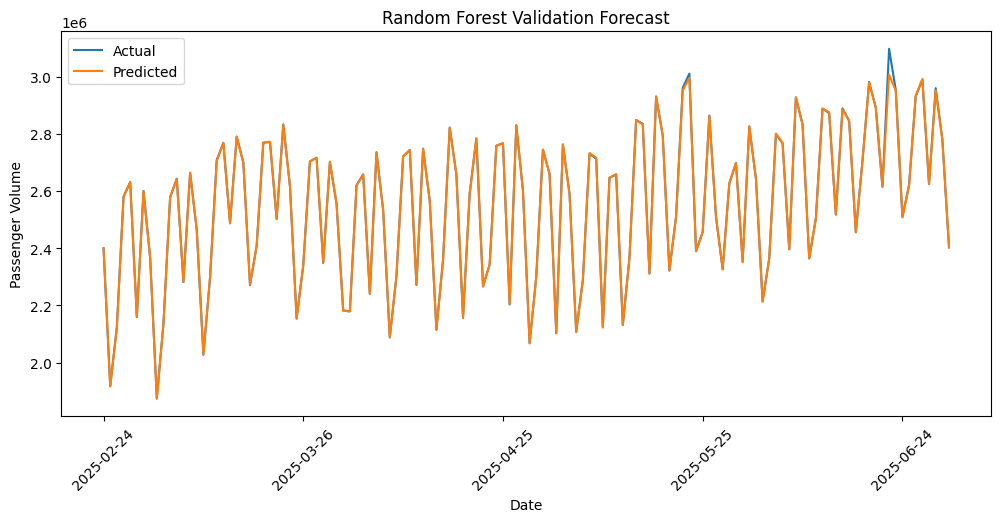

In [71]:
skip = 30 

val_dates = train_df['Date'].iloc[split_idx:]

plt.figure(figsize=(12,5))
plt.plot(val_dates, y_val.values, label="Actual")
plt.plot(val_dates, y_val_pred, label="Predicted")
plt.title("Random Forest Validation Forecast")
plt.xlabel("Date")
plt.ylabel("Passenger Volume")
plt.xticks(val_dates[::skip], rotation=45)
plt.legend()
plt.show()


 Testing Set

In [85]:
#Removing the date portion of the testing set as non numeric values aren't compatible with Random Forest
X_test = test_df[features].drop(columns=['Date'], errors='ignore')
y_test_pred = model.predict(X_test)
test_df['Predicted_Volume'] = y_test_pred
test_df.to_csv("tsa_test_predictions.csv", index=False)

Final plot of predicted passenger volumes on the test set

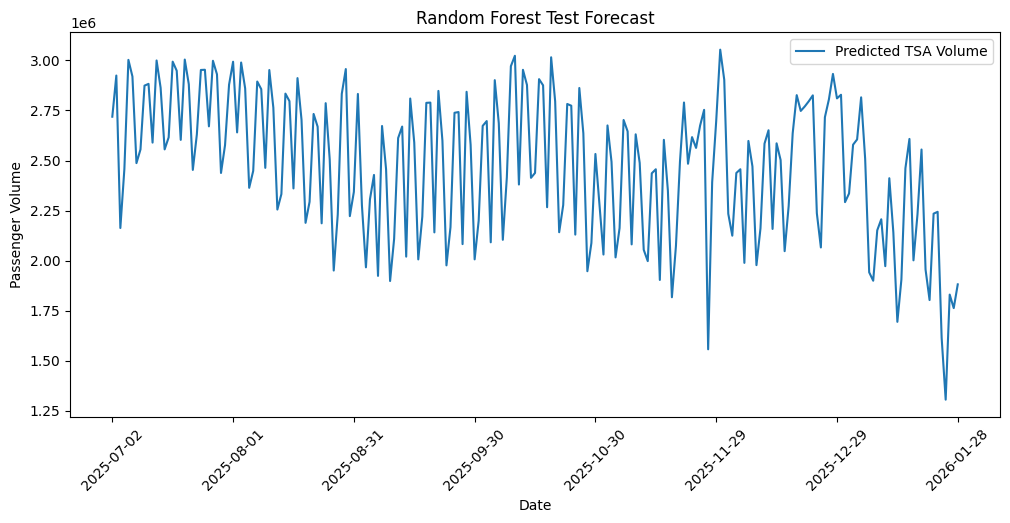

In [89]:
skip_test = 30
plt.figure(figsize=(12,5))
plt.plot(test_df['Date'], test_df['Predicted_Volume'], label="Predicted TSA Volume")
plt.xticks(test_df['Date'][::skip_test], rotation=45)
plt.xlabel("Date")
plt.ylabel("Passenger Volume")
plt.title("Random Forest Test Forecast")
plt.legend()
plt.show()


Comparing the predicted values and actual values on the test set

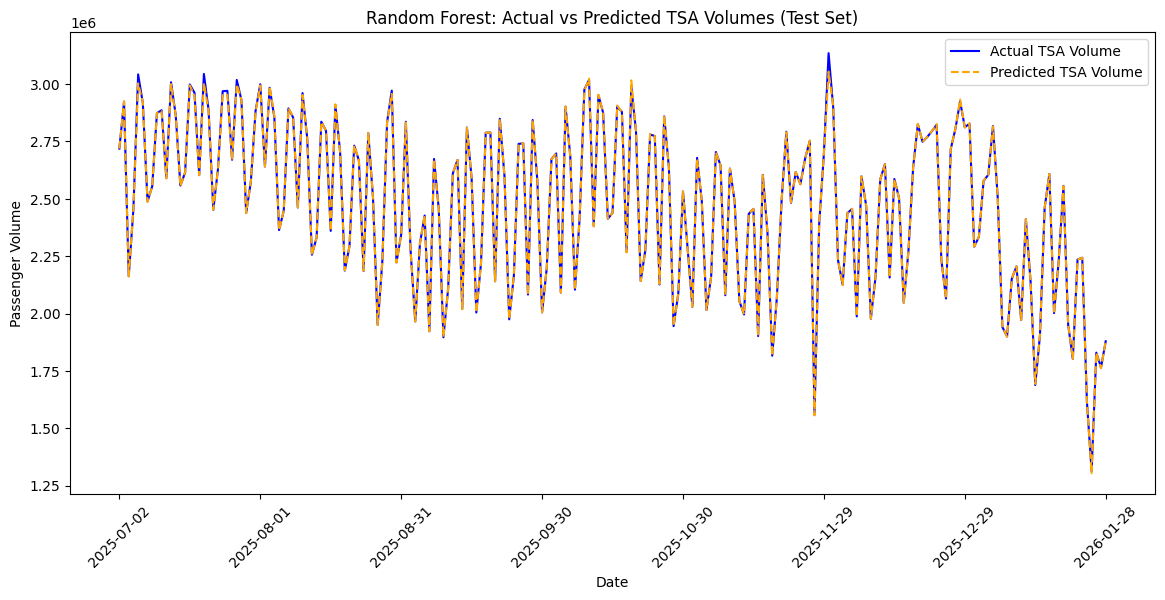

In [ ]:
skip_test = 30

plt.figure(figsize=(14,6))

plt.plot(test_df['Date'], test_df['Volume'], label="Actual TSA Volume", color="blue")
plt.plot(test_df['Date'], test_df['Predicted_Volume'], label="Predicted TSA Volume", color="orange", linestyle='--')

plt.title("Random Forest: Actual vs Predicted TSA Volumes (Test Set)")
plt.xlabel("Date")
plt.ylabel("Passenger Volume")
plt.xticks(test_df['Date'][::skip_test], rotation=45)
plt.legend()
plt.show()


Final Mean Absolute Error and Root Mean Squared Error Metrics

In [95]:
y_test_true = test_df['Volume']
y_test_pred = test_df['Predicted_Volume']
mae = mean_absolute_error(y_test_true, y_test_pred)
rmse = np.sqrt(mean_squared_error(y_test_true, y_test_pred))
mape = np.mean(np.abs((y_test_true - y_test_pred) / y_test_true)) * 100

print(f"Test Set Mean Absolute Error: {mae:.2f}")
print(f"Test Set Root Mean Squared Error: {rmse:.2f}")
print(f"Test Set Mean Absolute Percentage Error: {mape:.2f}%")



Test Set Mean Absolute Error: 2490.01
Test Set Root Mean Squared Error: 7713.43
Test Set Mean Absolute Percentage Error: 0.09%
